In [1]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting



from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric

In [2]:
# read data into a DataFrame
data = pd.read_csv('nyc-rolling-sales.csv', index_col=0)

In [3]:
data.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00


In [4]:
#! pip install pandas_profiling
#import pandas_profiling as pp

In [5]:
#report = pp.ProfileReport (data)
#report

In [6]:
data.shape

(84548, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84548 entries, 4 to 8413
Data columns (total 21 columns):
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GROSS SQUARE FEET                 84548 non-null object
YEA

In [8]:
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')



In [9]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.000000,6.998700e+04
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,0.819341,1.140526e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,1.000000,2.250000e+05
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000,5.300000e+05
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,2.000000,9.500000e+05
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [10]:
data[['SALE PRICE','GROSS SQUARE FEET','LAND SQUARE FEET']].dtypes

SALE PRICE           float64
GROSS SQUARE FEET    float64
LAND SQUARE FEET     float64
dtype: object

In [11]:
data['SALE PRICE'] = data['SALE PRICE'].fillna(0)
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].fillna(0)
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].fillna(0)

In [12]:
data = data[data['SALE PRICE'] > 10000]

In [13]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,58400.000000,58400.000000,58400.000000,58400.000000,58400.000000,58400.000000,58400.000000,5.840000e+04,5.840000e+04,58400.000000,58400.000000,5.840000e+04
mean,2.934760,4136.943459,391.636267,10708.021370,1.707021,0.164229,1.882175,2.381522e+03,2.226362e+03,1812.706216,1.629932,1.529690e+06
std,1.329816,3565.035239,670.468538,1246.413791,14.195353,9.934607,17.433206,3.551640e+04,2.389060e+04,501.550241,0.697483,1.247003e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000100e+04
25%,2.000000,1271.000000,21.000000,10280.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1920.000000,1.000000,3.893202e+05
50%,3.000000,3145.000000,50.000000,11206.000000,1.000000,0.000000,1.000000,7.080000e+02,0.000000e+00,1940.000000,2.000000,6.400000e+05
75%,4.000000,6092.000000,1002.000000,11357.000000,1.000000,0.000000,2.000000,2.500000e+03,1.836000e+03,1966.000000,2.000000,1.100000e+06
max,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [14]:
data.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [15]:
data = data[data['LAND SQUARE FEET'] > 0]

In [16]:
data['LAND SQUARE FEET'].describe()

count    2.935800e+04
mean     4.737410e+03
std      4.998132e+04
min      3.300000e+01
25%      2.000000e+03
50%      2.500000e+03
75%      4.000000e+03
max      4.252327e+06
Name: LAND SQUARE FEET, dtype: float64

In [17]:
data = data[data['GROSS SQUARE FEET'] > 0]

In [18]:
data['GROSS SQUARE FEET'].describe()

count    2.839000e+04
mean     4.574490e+03
std      3.410533e+04
min      1.200000e+02
25%      1.360000e+03
50%      1.872000e+03
75%      2.664000e+03
max      3.750565e+06
Name: GROSS SQUARE FEET, dtype: float64

In [19]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000,2.839000e+04,2.839000e+04,28390.000000,28390.000000,2.839000e+04
mean,3.539380,5556.875238,61.811307,10994.364248,3.045579,0.334942,3.379077,4.265634e+03,4.574490e+03,1940.099789,1.231560,1.693364e+06
std,1.018299,3777.326557,125.476168,514.833148,20.245921,14.246616,24.893394,3.818404e+04,3.410533e+04,46.090898,0.691726,1.727152e+07
min,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02,1.200000e+02,0.000000,1.000000,1.000100e+04
25%,3.000000,2691.000000,19.000000,10462.000000,1.000000,0.000000,1.000000,2.000000e+03,1.360000e+03,1920.000000,1.000000,4.375000e+05
50%,4.000000,4921.500000,38.000000,11221.000000,2.000000,0.000000,2.000000,2.500000e+03,1.872000e+03,1930.000000,1.000000,6.350000e+05
75%,4.000000,7835.750000,64.000000,11373.000000,2.000000,0.000000,2.000000,4.000000e+03,2.664000e+03,1960.000000,1.000000,9.700000e+05
max,5.000000,16319.000000,7501.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


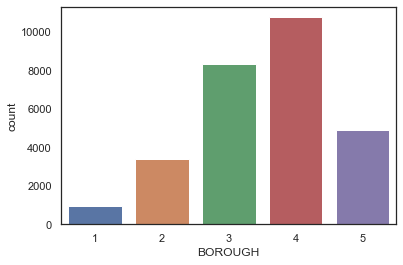

In [20]:
sns.countplot(x='BOROUGH', data=data)

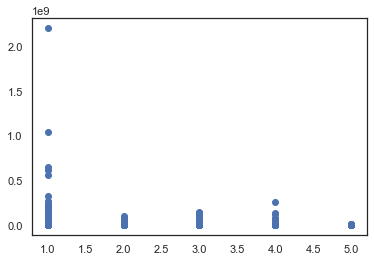

In [21]:
plt.scatter('BOROUGH', 'SALE PRICE', data =data)

In [22]:
np.percentile(data['SALE PRICE'], 95, axis=None, out=None)

3600000.0

In [23]:
#sns.countplot(x='YEAR BUILT', data=data)

In [24]:
#sns.countplot(x='LAND SQUARE FEET', data=data)

(array([1.35460330e-08, 1.96042129e-11, 4.78151534e-12, 1.43445460e-12,
        4.78151534e-13, 0.00000000e+00, 0.00000000e+00, 4.78151534e-13,
        9.56303069e-13, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.78151534e-13, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.78151534e-13]),
 array([1.00010000e+04, 7.36763343e+07, 1.47342668e+08, 2.21009001e+08,
        2.94675334e+08, 3.68341668e+08, 4.42008001e+08, 5.15674334e+08,
        5.89340667e+08, 6.63007001e+08, 7.36673334e+08, 8.10339667e+08,
        8.84006001e+08, 9.57672334e+08, 1.03133867e+09, 1.10500500e+09,
        1.17867133e+09, 1.25233767e+09, 1.32600400e+09, 1.39967033e+09,
        1.47333667e+09, 1.54700300e+09, 1.62066933e+09, 1.69433567e+09,
        1.76800200e+09

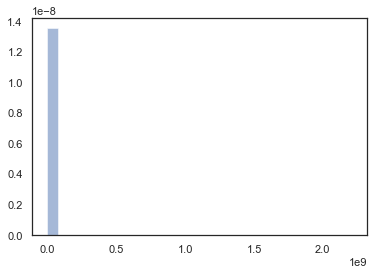

In [25]:
plt.hist(data['SALE PRICE'],bins=30, density=True, alpha=0.5)

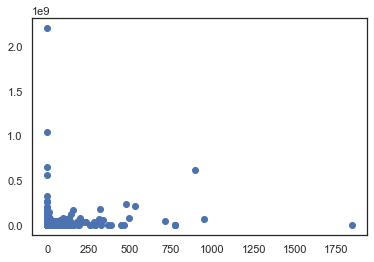

In [26]:
plt.scatter( 'RESIDENTIAL UNITS','SALE PRICE', data =data)

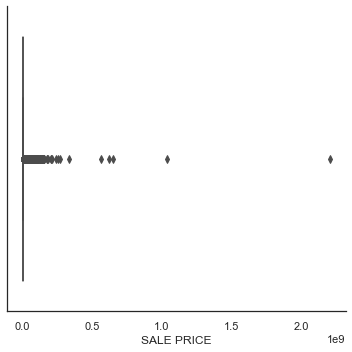

In [27]:
sns.catplot('SALE PRICE',data=data, kind = 'box')

In [28]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
print(IQR)

BOROUGH                           1.00
BLOCK                          5144.75
LOT                              45.00
ZIP CODE                        911.00
RESIDENTIAL UNITS                 1.00
COMMERCIAL UNITS                  0.00
TOTAL UNITS                       1.00
LAND SQUARE FEET               2000.00
GROSS SQUARE FEET              1304.00
YEAR BUILT                       40.00
TAX CLASS AT TIME OF SALE         0.00
SALE PRICE                   532500.00
dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x20d3b8a4a08>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3b8aab48>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3b8a0e88>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3b8acc48>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3b8acd48>],
 'means': []}

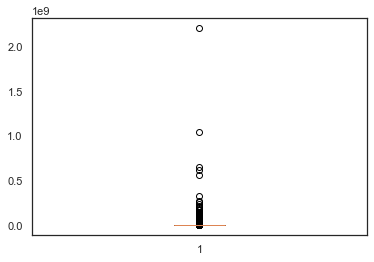

In [29]:
plt.boxplot(data['SALE PRICE'])

In [30]:
print(data['SALE PRICE'].quantile(0.05))
print(data['SALE PRICE'].quantile(0.95))

220000.0
3600000.0


In [31]:
data['SALE PRICE'] = np.where(data['SALE PRICE'] <220000, 220000,data['SALE PRICE'])
data['SALE PRICE'] = np.where(data['SALE PRICE'] > 3600000.0 , 3600000.0,data['SALE PRICE'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20d3cad3f48>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3cad7f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3cad35c8>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3cadbfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3cadbf48>],
 'means': []}

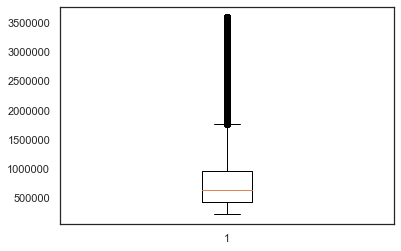

In [32]:
plt.boxplot(data['SALE PRICE'])

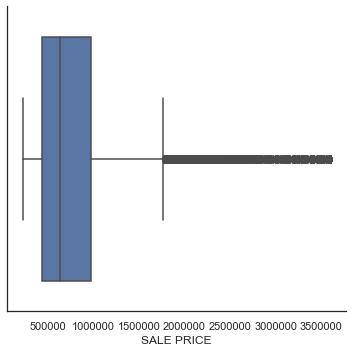

In [33]:
sns.catplot('SALE PRICE',data=data, kind = 'box')

{'whiskers': [<matplotlib.lines.Line2D at 0x20d3def9f88>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3def4f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3def94c8>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3deefec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3deeffc8>],
 'means': []}

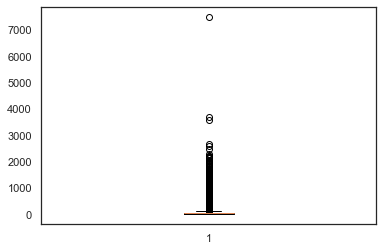

In [34]:
plt.boxplot(data['LOT'])

In [35]:
print(data['LOT'].quantile(0.05))
print(data['LOT'].quantile(0.95))

4.0
173.0


{'whiskers': [<matplotlib.lines.Line2D at 0x20d3cbcdcc8>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3cbd0c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3cbcd2c8>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3cbd5c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3cbd5d08>],
 'means': []}

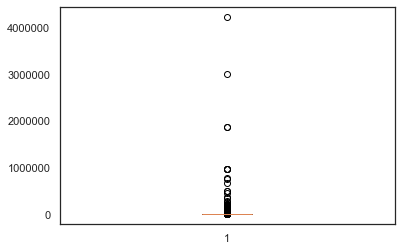

In [36]:
plt.boxplot(data['LAND SQUARE FEET'])

In [37]:
print(data['LAND SQUARE FEET'].quantile(0.05))
print(data['LAND SQUARE FEET'].quantile(0.95))

1462.0
7500.0


In [38]:
data['LAND SQUARE FEET'] = np.where(data['LAND SQUARE FEET'] < 1462.0, 1462.0,data['LAND SQUARE FEET'])
data['LAND SQUARE FEET'] = np.where(data['LAND SQUARE FEET'] > 7500.0 , 7500.0,data['LAND SQUARE FEET'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20d3cc31908>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3cc358c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3cc2ae08>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3cc35fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3cc39fc8>],
 'means': []}

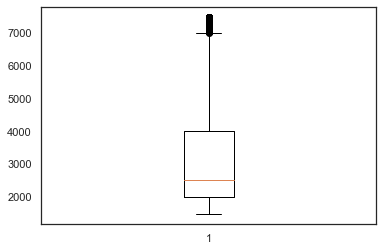

In [39]:
plt.boxplot(data['LAND SQUARE FEET'])

In [40]:
data.head(1)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,3600000.0,2017-07-19 00:00:00


{'whiskers': [<matplotlib.lines.Line2D at 0x20d3d4c4ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3d4c9a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3d4bdfc8>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3d4cda08>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3d4cdb08>],
 'means': []}

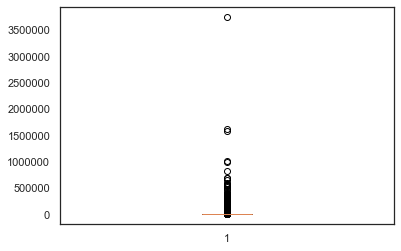

In [41]:
plt.boxplot(data['GROSS SQUARE FEET'])

In [42]:
print(data['GROSS SQUARE FEET'].quantile(0.05))
print(data['GROSS SQUARE FEET'].quantile(0.95))

981.9000000000001
7000.0


In [43]:
data['GROSS SQUARE FEET'] = np.where(data['GROSS SQUARE FEET'] < 981.9000000000001, 981.9000000000001,data['GROSS SQUARE FEET'])
data['GROSS SQUARE FEET'] = np.where(data['GROSS SQUARE FEET'] > 7000.0, 7000.0,data['GROSS SQUARE FEET'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20d3d52e648>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3d52ef08>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3d52ab48>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3d532e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3d536d08>],
 'means': []}

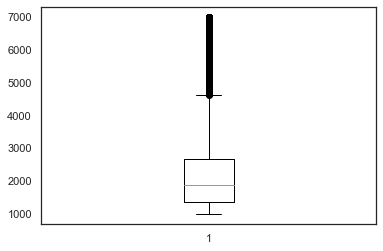

In [44]:
plt.boxplot(data['GROSS SQUARE FEET'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20d3d58fc08>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3d593bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3d58f148>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3d59ab48>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3d59ac48>],
 'means': []}

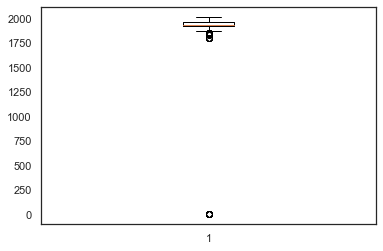

In [45]:
plt.boxplot(data['YEAR BUILT'])

In [46]:
print(data['YEAR BUILT'].quantile(0.05))
print(data['YEAR BUILT'].quantile(0.95))

1901.0
2004.0


In [47]:
data['YEAR BUILT'] = np.where(data['YEAR BUILT'] < 1901 , 1901,data['GROSS SQUARE FEET'])


{'whiskers': [<matplotlib.lines.Line2D at 0x20d3d5fbfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3d5fef88>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3d5fb508>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3d7c1f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3d7c1e88>],
 'means': []}

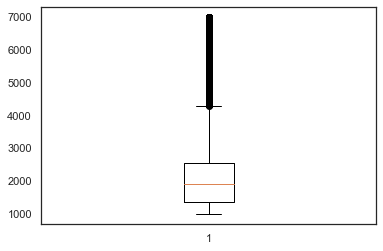

In [48]:
plt.boxplot(data['YEAR BUILT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20d3d821708>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3d821fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3d81dc88>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3d826f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3d82ddc8>],
 'means': []}

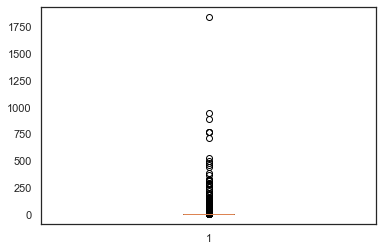

In [49]:
plt.boxplot(data['RESIDENTIAL UNITS'])

In [50]:
print(data['RESIDENTIAL UNITS'].quantile(0.05))
print(data['RESIDENTIAL UNITS'].quantile(0.95))


1.0
5.0


In [51]:
data['RESIDENTIAL UNITS'] = np.where(data['RESIDENTIAL UNITS'] < 0 , 0,data['RESIDENTIAL UNITS'])
data['RESIDENTIAL UNITS'] = np.where(data['RESIDENTIAL UNITS'] > 5 , 5,data['RESIDENTIAL UNITS'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20d3d88b308>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3d88bbc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3d886808>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3d890b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3d8939c8>],
 'means': []}

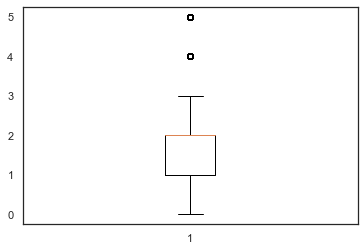

In [52]:
plt.boxplot(data['RESIDENTIAL UNITS'])

In [53]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000,28390.000000,2.839000e+04
mean,3.539380,5556.875238,61.811307,10994.364248,1.757872,0.334942,3.379077,3090.288517,2322.943219,2272.148542,1.231560,9.009080e+05
std,1.018299,3777.326557,125.476168,514.833148,1.105222,14.246616,24.893394,1555.661653,1459.897122,1415.131831,0.691726,8.091577e+05
min,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1462.000000,981.900000,981.900000,1.000000,2.200000e+05
25%,3.000000,2691.000000,19.000000,10462.000000,1.000000,0.000000,1.000000,2000.000000,1360.000000,1368.000000,1.000000,4.375000e+05
50%,4.000000,4921.500000,38.000000,11221.000000,2.000000,0.000000,2.000000,2500.000000,1872.000000,1900.000000,1.000000,6.350000e+05
75%,4.000000,7835.750000,64.000000,11373.000000,2.000000,0.000000,2.000000,4000.000000,2664.000000,2538.000000,1.000000,9.700000e+05
max,5.000000,16319.000000,7501.000000,11694.000000,5.000000,2261.000000,2261.000000,7500.000000,7000.000000,7000.000000,4.000000,3.600000e+06


In [54]:
data = data[data['TOTAL UNITS'] > 0]
data = data[data['COMMERCIAL UNITS'] > 0]
data = data[data['ZIP CODE'] > 0]
data = data[data['YEAR BUILT'] > 0]
data = data[data['RESIDENTIAL UNITS'] > 0]

In [55]:
data.shape

(1447, 21)

In [56]:
columns = [ 'BOROUGH','LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE']
sub_data = data[columns]

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(sub_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
sub_data.describe()

,BOROUGH,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,1447.000000,1447.00000,1447.000000,1.447000e+03
mean,2.903939,2838.11472,4150.648445,1.689814e+06
std,1.096217,1725.87968,1874.499524,1.233147e+06
min,1.000000,1462.00000,981.900000,2.200000e+05
25%,2.000000,1788.00000,2605.500000,6.558855e+05
50%,3.000000,2075.00000,3600.000000,1.200000e+06
75%,4.000000,3008.50000,5958.500000,3.000000e+06
max,5.000000,7500.00000,7000.000000,3.600000e+06


In [59]:
transformed_data = scaler.transform(sub_data)

In [60]:
transformed_data_df = pd.DataFrame(transformed_data, columns = sub_data.columns)

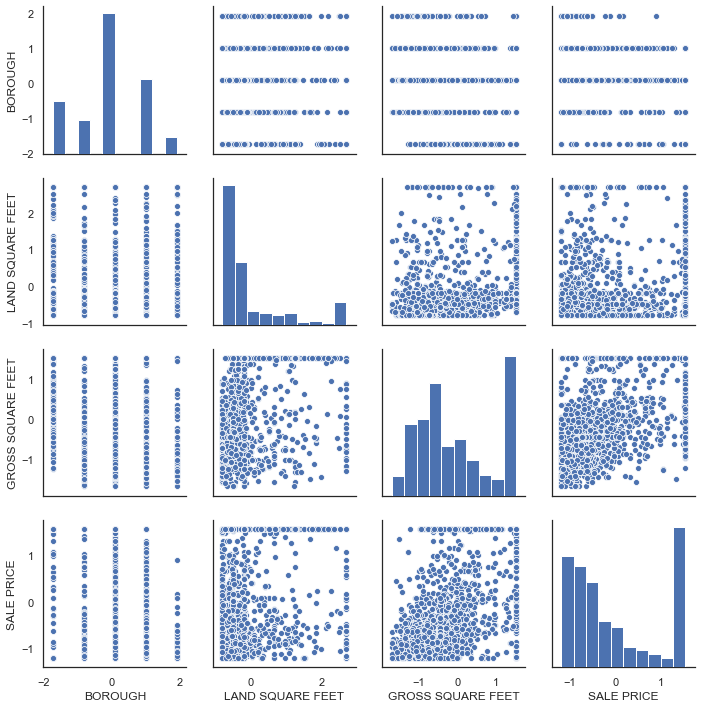

In [61]:
sns.pairplot(transformed_data_df)

In [62]:
correlation_coefficients = sub_data.corr()
correlation_coefficients

,BOROUGH,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,1.000000,-0.034910,-0.477425,-0.553631
LAND SQUARE FEET,-0.034910,1.000000,0.467543,0.287588
GROSS SQUARE FEET,-0.477425,0.467543,1.000000,0.670994
SALE PRICE,-0.553631,0.287588,0.670994,1.000000


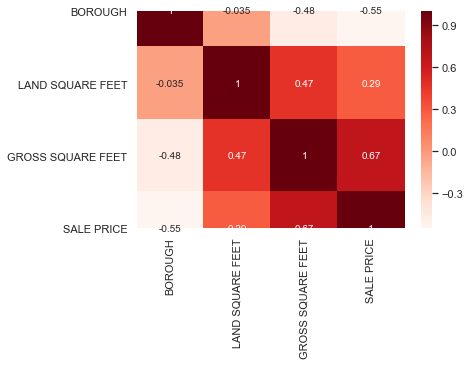

In [63]:
sns.heatmap(correlation_coefficients, annot=True, cmap='Reds')

In [64]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [65]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.00000,1447.000000,1447.000000,1447.000000,1.447000e+03
mean,2.903939,3944.240498,39.214236,10929.665515,2.800276,1.563234,14.606773,2838.11472,4150.648445,3921.561437,1.788528,1.689814e+06
std,1.096217,3156.361332,63.441523,512.578822,1.521465,1.646062,72.736576,1725.87968,1874.499524,1886.281251,0.953732,1.233147e+06
min,1.000000,16.000000,1.000000,10001.000000,1.000000,1.000000,1.000000,1462.00000,981.900000,981.900000,1.000000,2.200000e+05
25%,2.000000,1429.000000,9.000000,10457.000000,2.000000,1.000000,3.000000,1788.00000,2605.500000,2300.500000,1.000000,6.558855e+05
50%,3.000000,3200.000000,30.000000,11212.000000,2.000000,1.000000,3.000000,2075.00000,3600.000000,3300.000000,2.000000,1.200000e+06
75%,4.000000,5641.500000,48.000000,11234.000000,5.000000,2.000000,6.000000,3008.50000,5958.500000,5369.000000,2.000000,3.000000e+06
max,5.000000,16180.000000,1402.000000,11694.000000,5.000000,25.000000,1866.000000,7500.00000,7000.000000,7000.000000,4.000000,3.600000e+06


In [66]:
features = ['BOROUGH','NEIGHBORHOOD', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT', 'BLOCK', 'LOT','RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET','YEAR BUILT']
X_temp = data [features]
X = pd.get_dummies(X_temp)

In [67]:
#X = data [features]


In [68]:
X.shape

(1447, 227)

In [69]:
X.head(5)

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,NEIGHBORHOOD_ALPHABET CITY,...,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_4
176,1,391,19,3,1,4,1520.0,3360.0,3360.0,1,...,0,0,0,0,0,0,0,1,0,0
177,1,393,4,4,1,5,2201.0,5608.0,1901.0,1,...,0,0,0,0,0,0,0,1,0,0
178,1,394,5,5,1,6,1779.0,3713.0,3713.0,1,...,0,0,0,0,0,0,0,1,0,0
216,1,769,49,2,1,3,2150.0,4978.0,4978.0,0,...,0,0,0,0,0,1,0,0,0,0
220,1,696,37,5,1,7,1463.0,3762.0,3762.0,0,...,0,0,0,0,0,0,0,0,1,0


In [70]:
# Set y
y = data['SALE PRICE']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [72]:
model = LinearRegression() 

In [73]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
coefficient = model.coef_

In [75]:
intercept = model.intercept_

In [76]:
X.corr()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,NEIGHBORHOOD_ALPHABET CITY,...,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_4
BOROUGH,1.000000,0.398842,-0.017633,-0.469690,-0.156641,-0.115984,-0.034910,-0.477425,-0.345656,-0.079192,...,-0.043430,0.002305,0.026303,0.015470,0.005162,0.337636,-0.424016,0.020689,-0.166583,0.065445
BLOCK,0.398842,1.000000,0.024964,-0.345664,-0.079892,-0.046030,-0.059686,-0.364699,-0.248200,-0.051305,...,-0.040160,0.013950,0.013333,-0.032215,-0.019286,0.252243,-0.251207,-0.083535,-0.128934,0.098298
LOT,-0.017633,0.024964,1.000000,-0.005575,-0.029030,-0.038753,0.064076,0.001934,-0.023646,-0.021476,...,-0.014706,-0.010041,0.030181,0.023523,0.037127,0.035705,0.051084,-0.075077,-0.011205,-0.011770
RESIDENTIAL UNITS,-0.469690,-0.345664,-0.005575,1.000000,0.301755,0.231975,0.342486,0.791425,0.700683,0.035954,...,0.076147,-0.031127,-0.031127,-0.048095,0.054192,-0.684237,0.610772,0.199459,0.414750,-0.211687
COMMERCIAL UNITS,-0.156641,-0.079892,-0.029030,0.301755,1.000000,0.578835,0.426472,0.363008,0.354047,-0.015602,...,-0.018021,-0.009001,-0.009001,-0.022087,-0.005841,-0.309308,0.385140,-0.071297,0.030537,0.108064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAX CLASS AT PRESENT_1,0.337636,0.252243,0.035705,-0.684237,-0.309308,-0.151290,-0.301780,-0.641274,-0.559634,-0.041974,...,-0.048484,-0.024217,-0.024217,-0.037840,-0.054226,1.000000,-0.388889,-0.439050,-0.275662,-0.343786
TAX CLASS AT PRESENT_2,-0.424016,-0.251207,0.051084,0.610772,0.385140,0.313020,0.551469,0.628208,0.560873,-0.019249,...,-0.022234,-0.011106,-0.011106,-0.027250,-0.024867,-0.388889,1.000000,-0.201342,-0.126415,-0.157655
TAX CLASS AT PRESENT_2A,0.020689,-0.083535,-0.075077,0.199459,-0.071297,-0.064607,-0.175715,0.012319,-0.006159,0.095602,...,-0.025102,-0.012538,-0.012538,-0.030765,-0.028075,-0.439050,-0.201342,1.000000,-0.142720,-0.177990
TAX CLASS AT PRESENT_2B,-0.166583,-0.128934,-0.011205,0.414750,0.030537,-0.025574,-0.055622,0.314072,0.279755,-0.013644,...,-0.015761,-0.007872,-0.007872,-0.019316,-0.017627,-0.275662,-0.126415,-0.142720,1.000000,-0.111753


In [77]:
coefficient

array([-3.74332294e+05, -5.31832518e+01,  5.47513041e+00, -1.32354225e+05,
        2.11791193e+04,  6.59873017e+02,  1.10091148e+02,  1.58554052e+02,
        4.12660351e+01,  1.12867955e+06,  3.30409966e-06,  7.61845489e+05,
        4.49084400e+05,  5.50468282e+05,  5.83709165e+04,  3.94094968e-06,
        4.41695437e+05, -9.90756577e+05, -1.16801517e+05, -2.20033704e+05,
       -5.67205155e+05,  9.12553556e+05,  5.90784475e-06,  1.65071508e+06,
        1.34755372e+05,  2.34617619e-06,  1.77371912e+05, -1.05155929e+06,
        1.94478518e+06, -6.67441410e+05,  2.66940333e-06, -1.28023575e+05,
       -4.65405774e+05,  8.55024503e+05, -1.37849875e+06, -8.56089277e+05,
        7.39133729e+05,  6.40971714e+05, -8.71015559e+05,  2.39577113e+05,
        1.64946191e+05,  1.17393249e+06, -2.39180311e+05,  1.32579941e+06,
       -3.29546915e+05, -1.08873132e+05, -2.03400850e-06, -1.18513552e+05,
        1.26487052e+05, -1.48723242e+05, -2.23901773e+05, -6.21733853e+05,
        8.37400148e-06, -

In [78]:
intercept

1738273.8232956352

In [79]:
model.score(X_test, y_test)

0.5928491289083682

In [80]:
y_predicted = model.predict(X_test)

In [81]:
print(mse(y_predicted, y_test))

592729680592.809


In [82]:
np.sqrt(mse(y_predicted, y_test))

769889.3950385399